In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [14]:
df = pd.read_csv("./PM2.5/BeijingPM20100101_20151231.csv")
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 18 columns):
No                 52584 non-null int64
year               52584 non-null int64
month              52584 non-null int64
day                52584 non-null int64
hour               52584 non-null int64
season             52584 non-null int64
PM_Dongsi          25052 non-null float64
PM_Dongsihuan      20508 non-null float64
PM_Nongzhanguan    24931 non-null float64
PM_US Post         50387 non-null float64
DEWP               52579 non-null float64
HUMI               52245 non-null float64
PRES               52245 non-null float64
TEMP               52579 non-null float64
cbwd               52579 non-null object
Iws                52579 non-null float64
precipitation      52100 non-null float64
Iprec              52100 non-null float64
dtypes: float64(11), int64(6), object(1)
memory usage: 7.2+ MB


,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0
5,6,2010,1,1,5,4,NaN,NaN,NaN,NaN,-19.0,47.0,1017.0,-10.0,NW,16.10,0.0,0.0
6,7,2010,1,1,6,4,NaN,NaN,NaN,NaN,-19.0,44.0,1017.0,-9.0,NW,19.23,0.0,0.0
7,8,2010,1,1,7,4,NaN,NaN,NaN,NaN,-19.0,44.0,1017.0,-9.0,NW,21.02,0.0,0.0
8,9,2010,1,1,8,4,NaN,NaN,NaN,NaN,-19.0,44.0,1017.0,-9.0,NW,24.15,0.0,0.0
9,10,2010,1,1,9,4,NaN,NaN,NaN,NaN,-20.0,37.0,1017.0,-8.0,NW,27.28,0.0,0.0


In [23]:
periods = pd.PeriodIndex(year=df["year"],month=df["month"],
               day=df["day"],hour=df["hour"], freq="H")
data = df.set_index(periods).resample("10D").mean()
data.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 220 entries, 2010-01-01 to 2015-12-31
Freq: 10D
Data columns (total 17 columns):
No                 220 non-null float64
year               220 non-null float64
month              220 non-null float64
day                220 non-null float64
hour               220 non-null float64
season             220 non-null float64
PM_Dongsi          109 non-null float64
PM_Dongsihuan      105 non-null float64
PM_Nongzhanguan    109 non-null float64
PM_US Post         220 non-null float64
DEWP               220 non-null float64
HUMI               220 non-null float64
PRES               220 non-null float64
TEMP               220 non-null float64
Iws                220 non-null float64
precipitation      220 non-null float64
Iprec              220 non-null float64
dtypes: float64(17)
memory usage: 30.9 KB


In [40]:
data_us = data["PM_US Post"]
data_china = data["PM_Dongsi"]
#_x1 = data_us.index 

PeriodIndex(['2010-01-01', '2010-01-31', '2010-03-02', '2010-04-01',
             '2010-05-01', '2010-05-31', '2010-06-30', '2010-07-30',
             '2010-08-29', '2010-09-28', '2010-10-28', '2010-11-27',
             '2010-12-27', '2011-01-26', '2011-02-25', '2011-03-27',
             '2011-04-26', '2011-05-26', '2011-06-25', '2011-07-25',
             '2011-08-24', '2011-09-23', '2011-10-23', '2011-11-22',
             '2011-12-22', '2012-01-21', '2012-02-20', '2012-03-21',
             '2012-04-20', '2012-05-20', '2012-06-19', '2012-07-19',
             '2012-08-18', '2012-09-17', '2012-10-17', '2012-11-16',
             '2012-12-16', '2013-01-15', '2013-02-14', '2013-03-16',
             '2013-04-15', '2013-05-15', '2013-06-14', '2013-07-14',
             '2013-08-13', '2013-09-12', '2013-10-12', '2013-11-11',
             '2013-12-11', '2014-01-10', '2014-02-09', '2014-03-11',
             '2014-04-10', '2014-05-10', '2014-06-09', '2014-07-09',
             '2014-08-08', '2014-0

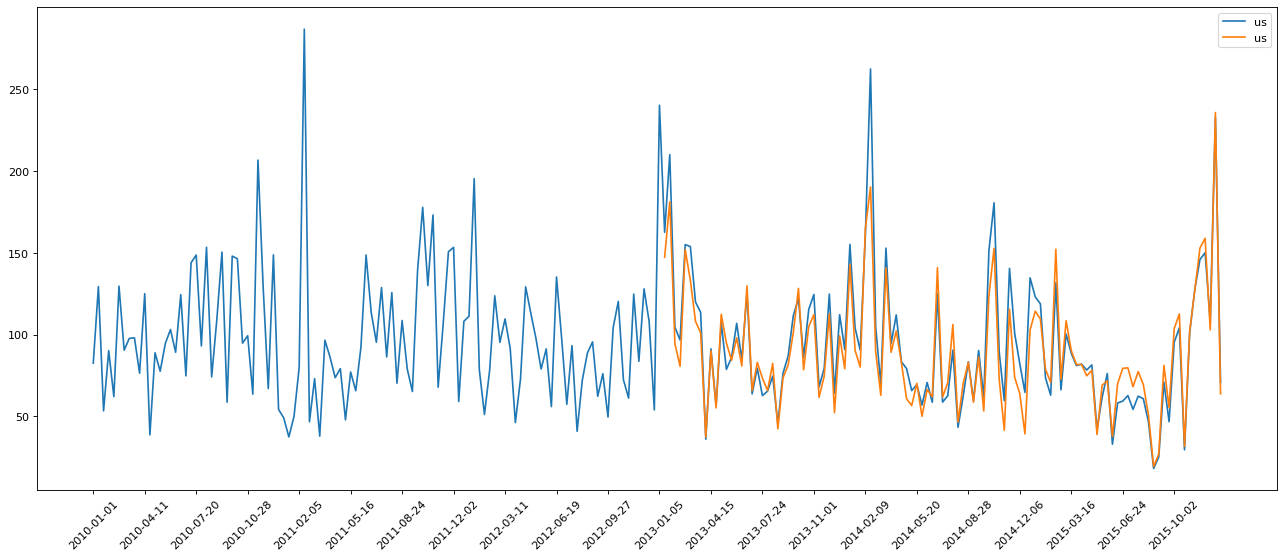

In [44]:
plt.figure(figsize = (20,8), dpi=80)

_x1 = data_us.index 
_y1 = data_us.values

_x2 = data_china.index 
_y2 = data_china.values

plt.plot(range(len(_x1)), _y1, label="us")
plt.plot(range(len(_x2)), _y2, label="us")#, color="yellow")

plt.xticks(range(len(_x1))[::10], _x1[::10], rotation=45)
plt.legend(loc="best")

plt.show()

In [34]:
range(10)[::2]

range(0, 10, 2)